## context:

#### 
Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great hel

##  Attribute Information:

#### 
    Age: age of the patient [years]
    Sex: sex of the patient [M: Male, F: Female]
    ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
    RestingBP: resting blood pressure [mm Hg]
    Cholesterol: serum cholesterol [mm/dl]
    FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
    RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
    MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
    ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
    Oldpeak: oldpeak = ST [Numeric value measured in depression]
    ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
    HeartDisease: output class [1: heart disease, 0: Normal]


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df=pd.read_csv("heart.csv")

In [7]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [8]:
###Data Preprocessing

In [9]:
df["HeartDisease"].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

In [10]:
df.isnull().sum()
#no null values in any column

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [11]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [12]:
#now let us check some categorical columns
df["Sex"].value_counts()


M    725
F    193
Name: Sex, dtype: int64

In [13]:
df["ChestPainType"].value_counts()

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

In [14]:
df["RestingECG"].value_counts()

Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64

In [15]:
df["ExerciseAngina"].value_counts()

N    547
Y    371
Name: ExerciseAngina, dtype: int64

In [16]:
df["ST_Slope"].value_counts()

Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64

In [17]:
df["FastingBS"].value_counts()

0    704
1    214
Name: FastingBS, dtype: int64

In [18]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [19]:
#making list if categorical columns except target column
catcolumns=["Sex","ChestPainType","RestingECG","ExerciseAngina","ST_Slope"]

<AxesSubplot:xlabel='Sex', ylabel='HeartDisease'>

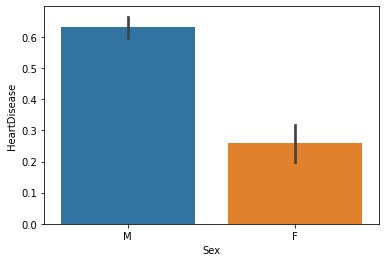

In [20]:
sns.barplot(data=df,x=df["Sex"],y=df["HeartDisease"])

<AxesSubplot:xlabel='ChestPainType', ylabel='HeartDisease'>

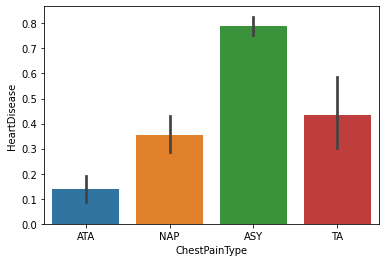

In [21]:
sns.barplot(data=df,x=df["ChestPainType"],y=df["HeartDisease"])

<AxesSubplot:xlabel='RestingECG', ylabel='HeartDisease'>

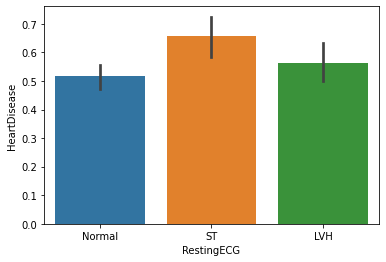

In [22]:
sns.barplot(data=df,x=df["RestingECG"],y=df["HeartDisease"])

<AxesSubplot:xlabel='ExerciseAngina', ylabel='HeartDisease'>

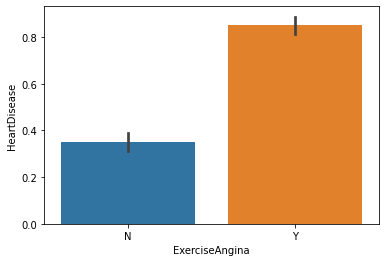

In [23]:
sns.barplot(data=df,x=df["ExerciseAngina"],y=df["HeartDisease"])

<AxesSubplot:xlabel='ST_Slope', ylabel='HeartDisease'>

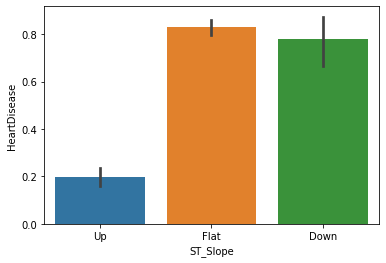

In [24]:
sns.barplot(data=df,x=df["ST_Slope"],y=df["HeartDisease"])

#### now let us fix categorical columns by one hot encoding

In [25]:

def onehotencode(df,col):
    dummies=pd.get_dummies(df[col],prefix=col)
    df=pd.concat([df,dummies],axis=1)
    df=df.drop(col,axis=1)
    return df
for col in catcolumns:
    df=onehotencode(df,col)

In [26]:
df

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,0,1,0,...,0,1,0,1,0,1,0,0,1,0
914,68,144,193,1,141,3.4,1,0,1,1,...,0,0,0,1,0,1,0,0,1,0
915,57,130,131,0,115,1.2,1,0,1,1,...,0,0,0,1,0,0,1,0,1,0
916,57,130,236,0,174,0.0,1,1,0,0,...,0,0,1,0,0,1,0,0,1,0


#### Dependent and Independent features


In [27]:
X=df.drop("HeartDisease",axis=1)
y=df["HeartDisease"]

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [29]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=101)

In [30]:
scaler=StandardScaler()
scaled_X_train=scaler.fit_transform(X_train)


In [31]:
scaled_X_test=scaler.transform(X_test)
scaled_X_test

array([[-0.96631334, -0.12488002,  0.10389961, ..., -0.28105444,
        -1.00625006,  1.16631647],
       [-1.17407394, -1.49676529, -1.77773655, ...,  3.55802958,
        -1.00625006, -0.85740022],
       [-2.00511636, -1.88089316,  0.2029331 , ..., -0.28105444,
        -1.00625006,  1.16631647],
       ...,
       [-0.23915122,  0.97262819,  0.02287222, ..., -0.28105444,
        -1.00625006,  1.16631647],
       [-0.55079213, -1.22238824,  0.1219057 , ..., -0.28105444,
        -1.00625006,  1.16631647],
       [ 0.9035321 , -0.94801118, -1.77773655, ..., -0.28105444,
         0.99378876, -0.85740022]])

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [33]:
log_model=LogisticRegression()
log_model.fit(scaled_X_train,y_train)
RFC_model=RandomForestClassifier()
RFC_model.fit(scaled_X_train,y_train)
SVC_model=SVC()
SVC_model.fit(scaled_X_train,y_train)
KNN_model=KNeighborsClassifier()
KNN_model.fit(scaled_X_train,y_train)

KNeighborsClassifier()

In [34]:
from sklearn.metrics import accuracy_score,confusion_matrix,plot_confusion_matrix,classification_report

In [35]:
y_logpred=log_model.predict(scaled_X_test)
y_RFCpred=RFC_model.predict(scaled_X_test)
y_SVCpred=SVC_model.predict(scaled_X_test)
y_KNNpred=KNN_model.predict(scaled_X_test)

#### comparing accuracy scores of above models and chose the highest one

In [36]:
print("Accuracy score for logistic regression is "+str(accuracy_score(y_test,y_logpred)))
print("Accuracy score for Random forest classifier is "+str(accuracy_score(y_test,y_RFCpred)))
print("Accuracy score for Support Vector Classifier is "+str(accuracy_score(y_test,y_SVCpred)))
print("Accuracy score for k nearest neighbour is "+str(accuracy_score(y_test,y_KNNpred)))

Accuracy score for logistic regression is 0.8369565217391305
Accuracy score for Random forest classifier is 0.8623188405797102
Accuracy score for Support Vector Classifier is 0.8514492753623188
Accuracy score for k nearest neighbour is 0.855072463768116


#### Now Let us do hyper parameter tuning for random forest and support vector machine

In [37]:
#first let us get confusion matrix and classification report for random forest
print(confusion_matrix(y_test,y_RFCpred))
print(classification_report(y_test,y_RFCpred))

[[105  21]
 [ 17 133]]
              precision    recall  f1-score   support

           0       0.86      0.83      0.85       126
           1       0.86      0.89      0.88       150

    accuracy                           0.86       276
   macro avg       0.86      0.86      0.86       276
weighted avg       0.86      0.86      0.86       276



In [38]:
rf=RandomForestClassifier()


In [39]:
from sklearn.model_selection import RandomizedSearchCV
#number of trees in random forest
n_estimators=[int(x) for x in np.linspace(start=200,stop=2000,num=10)]
#number of features to cnsider at every split
max_features=["auto","sqrt","log2"]
#maximum number of levels in tree
max_depth=[int(x) for x in np.linspace(10,1000,10)]
#minimum number of samples required to split a node
min_samples_split=[2,5,10,14]
#minimum number of samples required at each leaf node
min_samples_leaf=[1,2,4,6,8]
#create the random grid
random_grid={"n_estimators":n_estimators,
            "max_features":max_features,
            "max_depth":max_depth,
            "min_samples_split":min_samples_split,
            "min_samples_leaf":min_samples_leaf,
            "criterion":["entropy","gini"]}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [40]:
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,random_state=100,n_jobs=-1)
rf_randomcv.fit(scaled_X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=2)

In [41]:
rf_randomcv.best_params_

{'n_estimators': 200,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 560,
 'criterion': 'gini'}

In [42]:
best_random_grid=rf_randomcv.best_estimator_

In [43]:
y_rfpred1=best_random_grid.predict(X_test)
print(confusion_matrix(y_test,y_rfpred1))
print(accuracy_score(y_test,y_rfpred1))

[[ 51  75]
 [  5 145]]
0.7101449275362319


c:\users\sampath\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


### Now lt us do hyper parameter tuning for support vector classifier


In [44]:
svc=SVC()
from sklearn.model_selection import GridSearchCV

In [45]:
param_grid= {'C': [0.1, 1, 10, 100], 
              'gamma': [10,1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf',"poly","sigmoid"],
               "degree":[1,2,3,4,5,6]} 

In [46]:
svc_gridcv=RandomizedSearchCV(svc,param_grid,refit=True,verbose=2)
svc_gridcv.fit(scaled_X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ..............C=10, degree=3, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ..............C=10, degree=3, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ..............C=10, degree=3, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ..............C=10, degree=3, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ..............C=10, degree=3, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ...............C=10, degree=5, gamma=1, kernel=poly; total time=   0.0s
[CV] END ...............C=10, degree=5, gamma=1, kernel=poly; total time=   0.0s
[CV] END ...............C=10, degree=5, gamma=1, kernel=poly; total time=   0.0s
[CV] END ...............C=10, degree=5, gamma=1, kernel=poly; total time=   0.0s
[CV] END ...............C=10, degree=5, gamma=1, kernel=poly; total time=   0.0s
[CV] END .............C=100, degree=4, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .............C=100, degree=4, gamma=0.1

RandomizedSearchCV(estimator=SVC(),
                   param_distributions={'C': [0.1, 1, 10, 100],
                                        'degree': [1, 2, 3, 4, 5, 6],
                                        'gamma': [10, 1, 0.1, 0.01, 0.001,
                                                  0.0001],
                                        'kernel': ['rbf', 'poly', 'sigmoid']},
                   verbose=2)

In [47]:
svc_gridcv.best_params_
#the below are the best hyper parameters

{'kernel': 'rbf', 'gamma': 0.01, 'degree': 4, 'C': 1}

In [48]:
best_r_grid=svc_gridcv.best_estimator_
best_r_grid

SVC(C=1, degree=4, gamma=0.01)

In [49]:
y_svcpred1=best_r_grid.predict(X_test)

c:\users\sampath\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


In [50]:
print(confusion_matrix(y_test,y_svcpred1))
print(accuracy_score(y_test,y_svcpred1))

[[  0 126]
 [  0 150]]
0.5434782608695652


#### Here we can clearly see that random forest works better than svm so let us go with random forest 

In [51]:
### Saving the model to disk
import pickle

In [53]:
file_name="final heart failure prediction model"
pickle.dump(rf,open(file_name,"wb"))